In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [2]:
%%time
# Load BES Panel for Wave 8
parsed_data = pd.read_pickle("man_of_2017_parsed.pkl")
#(31409, 733)

# BES_Panel = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.6.dta")

print( parsed_data.shape )

(313, 83)
Wall time: 18 ms


In [3]:
numerics_only = pd.DataFrame()
for col in parsed_data.columns:
    # drop object and datetime64[ns] silently
    if str( parsed_data[col].dtype ) == 'category':
        numerics_only[col] = parsed_data[col].cat.codes.astype('float')
    elif ( str( parsed_data[col].dtypes ) == 'bool') | ( str( parsed_data[col].dtypes ) == 'int64' ) :
        numerics_only[col] = parsed_data[col].astype('float')


In [4]:
non_ordinal = [ "how_would_you_describe_your" , "where_do_you_live" ]
pol_identity = parsed_data.columns[parsed_data.dtypes==bool]

In [5]:
parsed_data[ parsed_data.columns[parsed_data.dtypes==bool] ].sum()

socialist                163
liberal                  181
feminist                 210
egalitarian              105
libertarian               36
anarchist                 24
moderate                 104
conservative              25
men_s_rights_activist     10
dtype: int64

In [6]:
temp = StandardScaler().fit_transform( numerics_only )
man_std = pd.DataFrame(temp,
                       columns = numerics_only.columns,
                       index   = numerics_only.index)
# man_std.drop(non_ordinal, axis=1,inplace=True)
# man_std.drop(pol_identity, axis=1,inplace=True)

In [8]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [9]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [17]:
X = man_std.values

In [20]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


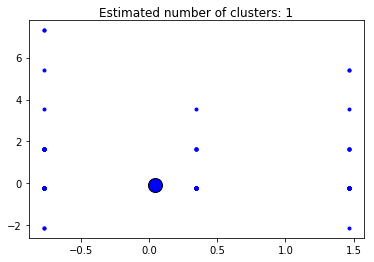

In [21]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Automatically created module for IPython interactive environment
[ 0.08945721  0.09265199  0.08306763  0.13418421  0.07987285  0.09584678
  0.07667806  0.15335293  0.07987285  0.11501549]
True
[ 0.08978328  0.09287926  0.08359133  0.13312693  0.08049536  0.09597523
  0.07739938  0.15170279  0.08049536  0.11455108]
True
[ 0.09987395  0.09977698  0.09958305  0.1008436   0.09948609  0.09987395
  0.09929216  0.10142539  0.09938912  0.10045574]
True
[ 0.09551733  0.09518335  0.08533169  0.13531031  0.08138265  0.09644149
  0.07719498  0.14686696  0.07829019  0.10848105]
True
[ 0.09013278  0.0931683   0.08378477  0.1333266   0.08054828  0.09595583
  0.0773155   0.15140185  0.08026003  0.11410606]
True
[ 0.08978746  0.09288265  0.08359355  0.13312915  0.08049589  0.09597491
  0.07739835  0.15169925  0.08049267  0.11454612]
True
